<a href="https://colab.research.google.com/github/eslamahmedamit/food-recipes-recsys/blob/main/Copy_of_final_sent_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import


In [1]:
"""
we make recommendation based on the similarity of the items for food recipes based on the ingredients and recipe specifications using the cosine similarity method
and train word2vec model from scratch using gensim library on my dataset and then use the trained model to find the similarity between the ingredients of the recipes.
"""

# Importing the libraries
# !pip install textblob
# !pip install POT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
# pd.set_option('display.max_colwidth', None)
nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')
nltk.download('wordnet')
# show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing the dataset
df = pd.read_csv('https://github.com/eslamahmedamit/food-recipes-recsys/blob/87cf871934c5eb6adb16759ab0d190fba921211a/recipes_data_graduation_project.csv?raw=true')

# Data Preprocessing
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,name,url,category,author,summary,rating,rating_count,review_count,ingredients,directions,prep,cook,total,servings,yield,calories,carbohydrates_g,sugars_g,fat_g,saturated_fat_g,cholesterol_mg,protein_g,dietary_fiber_g,sodium_mg,calories_from_fat,calcium_mg,iron_mg,magnesium_mg,potassium_mg,vitamin_a_iu_IU,niacin_equivalents_mg,vitamin_c_mg,folate_mcg,thiamin_mg,diet_type,allergens,cuisine
0,Simple Macaroni and Cheese,https://www.allrecipes.com/recipe/238691/simpl...,main-dish,g0dluvsugly,A very quick and easy fix to a tasty side-dish...,4.42,834,575,1 (8 ounce) box elbow macaroni ; ¼ cup butter ...,Bring a large pot of lightly salted water to a...,10 mins,20 mins,30 mins,4,4 servings,630.2,55.0,7.6,33.6,20.9,99.6,26.5,2.1,777.0,302.2,567.9,2.7,61.8,380.0,1152.0,10.1,0.3,165.6,0.7,"vegetarian, omnivore, keto",milk,chinese
1,Gourmet Mushroom Risotto,https://www.allrecipes.com/recipe/85389/gourme...,main-dish,Myleen Sagrado Sjödin,Authentic Italian-style risotto cooked the slo...,4.80,3388,2245,"6 cups chicken broth, divided ; 3 tablespoons ...","In a saucepan, warm the broth over low heat. W...",20 mins,30 mins,50 mins,6,6 servings,430.6,56.6,4.4,16.6,6.6,29.3,11.3,2.7,1130.8,149.8,70.1,2.1,24.1,692.0,520.3,7.5,3.8,36.9,0.1,"vegetarian, omnivore, paleo, keto",milk,unknown
2,Dessert Crepes,https://www.allrecipes.com/recipe/19037/desser...,breakfast-and-brunch,ANN57,Essential crepe recipe. Sprinkle warm crepes ...,4.80,1156,794,"4 eggs, lightly beaten ; 1 ⅓ cups milk ; 2 ta...","In large bowl, whisk together eggs, milk, melt...",10 mins,10 mins,20 mins,8,8 crepes,163.8,17.2,5.3,7.7,3.4,111.1,6.4,0.4,234.5,69.0,65.6,1.2,11.2,115.4,347.8,2.3,0.1,43.5,0.2,"vegetarian, omnivore, paleo","eggs, milk",chinese
3,Pork Steaks,https://www.allrecipes.com/recipe/70463/pork-s...,meat-and-poultry,BABYLOVE1222,My mom came up with this recipe when I was a c...,4.57,689,539,¼ cup butter ; ¼ cup soy sauce ; 1 bunch green...,"Melt butter in a skillet, and mix in the soy s...",15 mins,30 mins,45 mins,6,6 servings,353.1,3.9,1.1,25.4,11.4,118.0,26.5,1.1,719.7,228.4,59.0,2.5,35.4,436.9,618.3,9.0,7.4,25.8,0.7,"omnivore, keto",milk,chinese
4,Quick and Easy Pizza Crust,https://www.allrecipes.com/recipe/20171/quick-...,bread,CHEF RIDER,This is a great recipe when you don't want to ...,4.70,3741,2794,1 (.25 ounce) package active dry yeast ; 1 tea...,Preheat oven to 450 degrees F (230 degrees C)....,_,_,_,8,1 12-inch pizza crust,169.8,28.1,0.6,4.0,0.6,NaN,4.8,1.1,292.8,36.3,7.3,1.8,10.5,55.4,0.8,4.1,NaN,89.1,0.3,paleo,wheat,chinese


In [2]:
import pandas as pd
# https://github.com/eslamahmedamit/food-recipes-recsys/blob/87cf871934c5eb6adb16759ab0d190fba921211a/recipes_data_graduation_project.csv
df = pd.read_csv('https://github.com/eslamahmedamit/food-recipes-recsys/blob/87cf871934c5eb6adb16759ab0d190fba921211a/recipes_data_graduation_project.csv?raw=true')
# df

In [3]:
df.describe(include='all')

,name,url,category,author,summary,rating,rating_count,review_count,ingredients,directions,prep,cook,total,servings,yield,calories,carbohydrates_g,sugars_g,fat_g,saturated_fat_g,cholesterol_mg,protein_g,dietary_fiber_g,sodium_mg,calories_from_fat,calcium_mg,iron_mg,magnesium_mg,potassium_mg,vitamin_a_iu_IU,niacin_equivalents_mg,vitamin_c_mg,folate_mcg,thiamin_mg,diet_type,allergens,cuisine
count,35502,35502,35502,35502,35502,35502.000000,35502.000000,35502.000000,35502,35502,35502,35502,35502,35502.000000,35501,35388.000000,35354.000000,34825.000000,35084.000000,34300.000000,29914.000000,35241.000000,34130.000000,35371.000000,35045.000000,35357.000000,34954.000000,35302.000000,35357.000000,34845.000000,34827.000000,32074.000000,35197.000000,27178.000000,30188,26926,35502
unique,35502,35502,22,20778,35477,NaN,NaN,NaN,35486,35469,82,252,471,NaN,4523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,78,15
top,Simple Macaroni and Cheese,https://www.allrecipes.com/recipe/238691/simpl...,appetizers-and-snacks,Chef John,Quick and easy.,NaN,NaN,NaN,12 eggs,Place all ingredients into blender and blend o...,15 mins,_,30 mins,NaN,4 servings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"vegetarian, omnivore, keto",milk,chinese
freq,1,1,5717,1050,3,NaN,NaN,NaN,4,12,9269,5381,2501,NaN,5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5377,10300,22606
mean,NaN,NaN,NaN,NaN,NaN,4.018156,138.743817,103.524083,NaN,NaN,NaN,NaN,NaN,10.457693,NaN,315.794639,28.673358,10.114056,16.656205,6.289808,72.173370,13.936137,2.743926,601.451412,149.769884,103.560492,2.293071,36.662484,361.356914,1330.484796,5.539248,16.497038,51.180598,0.240805,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.347340,516.514490,373.953839,NaN,NaN,NaN,NaN,NaN,12.307612,NaN,212.234001,24.105625,13.124748,14.535131,6.415790,74.780701,13.996211,2.960770,1703.091354,139.946792,126.166047,3.149204,34.776061,344.569265,3304.192468,6.050336,28.928640,58.508636,0.256043,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.120000,4.000000,3.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,165.200000,11.000000,2.000000,6.700000,1.900000,21.800000,3.600000,0.800000,167.200000,60.000000,28.700000,0.900000,12.800000,109.500000,161.300000,1.400000,1.400000,14.100000,0.100000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.480000,23.000000,18.000000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,277.000000,24.200000,5.100000,13.200000,4.300000,51.900000,8.400000,1.900000,372.100000,118.600000,61.600000,1.600000,28.100000,260.100000,434.300000,3.200000,5.900000,34.200000,0.200000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.670000,94.000000,72.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,419.200000,40.400000,13.200000,22.800000,8.600000,96.900000,21.700000,3.600000,773.050000,204.700000,125.500000,2.900000,50.400000,508.900000,1062.500000,7.800000,20.100000,66.700000,0.300000,NaN,NaN,NaN


In [4]:
'''
data features:
['name', 'url', 'category', 'author', 'summary', 'rating',
       'rating_count', 'review_count', 'ingredients', 'directions', 'prep',
       'cook', 'total', 'servings', 'yield', 'calories', 'carbohydrates_g',
       'sugars_g', 'fat_g', 'saturated_fat_g', 'cholesterol_mg', 'protein_g',
       'dietary_fiber_g', 'sodium_mg', 'calories_from_fat', 'calcium_mg',
       'iron_mg', 'magnesium_mg', 'potassium_mg', 'vitamin_a_iu_IU',
       'niacin_equivalents_mg', 'vitamin_c_mg', 'folate_mcg', 'thiamin_mg',
       'diet_type', 'allergens', 'cuisine']
'''
df.columns

Index(['name', 'url', 'category', 'author', 'summary', 'rating',
       'rating_count', 'review_count', 'ingredients', 'directions', 'prep',
       'cook', 'total', 'servings', 'yield', 'calories', 'carbohydrates_g',
       'sugars_g', 'fat_g', 'saturated_fat_g', 'cholesterol_mg', 'protein_g',
       'dietary_fiber_g', 'sodium_mg', 'calories_from_fat', 'calcium_mg',
       'iron_mg', 'magnesium_mg', 'potassium_mg', 'vitamin_a_iu_IU',
       'niacin_equivalents_mg', 'vitamin_c_mg', 'folate_mcg', 'thiamin_mg',
       'diet_type', 'allergens', 'cuisine'],
      dtype='object')

In [5]:
# split features into text and numerical features
text_features = ['url','name','category','summary','ingredients','diet_type','allergens','cuisine']

numerical_features = ['rating','total','servings','yield','calories','fat_g','protein_g','sugars_g','vitamin_c_mg','sodium_mg']


In [6]:
# df = df[text_features]
# numerical_data = df[numerical_features]

df.head()

,name,url,category,author,summary,rating,rating_count,review_count,ingredients,directions,prep,cook,total,servings,yield,calories,carbohydrates_g,sugars_g,fat_g,saturated_fat_g,cholesterol_mg,protein_g,dietary_fiber_g,sodium_mg,calories_from_fat,calcium_mg,iron_mg,magnesium_mg,potassium_mg,vitamin_a_iu_IU,niacin_equivalents_mg,vitamin_c_mg,folate_mcg,thiamin_mg,diet_type,allergens,cuisine
0,Simple Macaroni and Cheese,https://www.allrecipes.com/recipe/238691/simpl...,main-dish,g0dluvsugly,A very quick and easy fix to a tasty side-dish...,4.42,834,575,1 (8 ounce) box elbow macaroni ; ¼ cup butter ...,Bring a large pot of lightly salted water to a...,10 mins,20 mins,30 mins,4,4 servings,630.2,55.0,7.6,33.6,20.9,99.6,26.5,2.1,777.0,302.2,567.9,2.7,61.8,380.0,1152.0,10.1,0.3,165.6,0.7,"vegetarian, omnivore, keto",milk,chinese
1,Gourmet Mushroom Risotto,https://www.allrecipes.com/recipe/85389/gourme...,main-dish,Myleen Sagrado Sjödin,Authentic Italian-style risotto cooked the slo...,4.80,3388,2245,"6 cups chicken broth, divided ; 3 tablespoons ...","In a saucepan, warm the broth over low heat. W...",20 mins,30 mins,50 mins,6,6 servings,430.6,56.6,4.4,16.6,6.6,29.3,11.3,2.7,1130.8,149.8,70.1,2.1,24.1,692.0,520.3,7.5,3.8,36.9,0.1,"vegetarian, omnivore, paleo, keto",milk,unknown
2,Dessert Crepes,https://www.allrecipes.com/recipe/19037/desser...,breakfast-and-brunch,ANN57,Essential crepe recipe. Sprinkle warm crepes ...,4.80,1156,794,"4 eggs, lightly beaten ; 1 ⅓ cups milk ; 2 ta...","In large bowl, whisk together eggs, milk, melt...",10 mins,10 mins,20 mins,8,8 crepes,163.8,17.2,5.3,7.7,3.4,111.1,6.4,0.4,234.5,69.0,65.6,1.2,11.2,115.4,347.8,2.3,0.1,43.5,0.2,"vegetarian, omnivore, paleo","eggs, milk",chinese
3,Pork Steaks,https://www.allrecipes.com/recipe/70463/pork-s...,meat-and-poultry,BABYLOVE1222,My mom came up with this recipe when I was a c...,4.57,689,539,¼ cup butter ; ¼ cup soy sauce ; 1 bunch green...,"Melt butter in a skillet, and mix in the soy s...",15 mins,30 mins,45 mins,6,6 servings,353.1,3.9,1.1,25.4,11.4,118.0,26.5,1.1,719.7,228.4,59.0,2.5,35.4,436.9,618.3,9.0,7.4,25.8,0.7,"omnivore, keto",milk,chinese
4,Quick and Easy Pizza Crust,https://www.allrecipes.com/recipe/20171/quick-...,bread,CHEF RIDER,This is a great recipe when you don't want to ...,4.70,3741,2794,1 (.25 ounce) package active dry yeast ; 1 tea...,Preheat oven to 450 degrees F (230 degrees C)....,_,_,_,8,1 12-inch pizza crust,169.8,28.1,0.6,4.0,0.6,NaN,4.8,1.1,292.8,36.3,7.3,1.8,10.5,55.4,0.8,4.1,NaN,89.1,0.3,paleo,wheat,chinese


In [7]:
df.describe()

,rating,rating_count,review_count,servings,calories,carbohydrates_g,sugars_g,fat_g,saturated_fat_g,cholesterol_mg,protein_g,dietary_fiber_g,sodium_mg,calories_from_fat,calcium_mg,iron_mg,magnesium_mg,potassium_mg,vitamin_a_iu_IU,niacin_equivalents_mg,vitamin_c_mg,folate_mcg,thiamin_mg
count,35502.000000,35502.000000,35502.000000,35502.000000,35388.000000,35354.000000,34825.000000,35084.000000,34300.000000,29914.000000,35241.000000,34130.000000,35371.000000,35045.000000,35357.000000,34954.000000,35302.000000,35357.000000,34845.000000,34827.000000,32074.000000,35197.000000,27178.000000
mean,4.018156,138.743817,103.524083,10.457693,315.794639,28.673358,10.114056,16.656205,6.289808,72.173370,13.936137,2.743926,601.451412,149.769884,103.560492,2.293071,36.662484,361.356914,1330.484796,5.539248,16.497038,51.180598,0.240805
std,1.347340,516.514490,373.953839,12.307612,212.234001,24.105625,13.124748,14.535131,6.415790,74.780701,13.996211,2.960770,1703.091354,139.946792,126.166047,3.149204,34.776061,344.569265,3304.192468,6.050336,28.928640,58.508636,0.256043
min,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.120000,4.000000,3.000000,4.000000,165.200000,11.000000,2.000000,6.700000,1.900000,21.800000,3.600000,0.800000,167.200000,60.000000,28.700000,0.900000,12.800000,109.500000,161.300000,1.400000,1.400000,14.100000,0.100000
50%,4.480000,23.000000,18.000000,8.000000,277.000000,24.200000,5.100000,13.200000,4.300000,51.900000,8.400000,1.900000,372.100000,118.600000,61.600000,1.600000,28.100000,260.100000,434.300000,3.200000,5.900000,34.200000,0.200000
75%,4.670000,94.000000,72.000000,12.000000,419.200000,40.400000,13.200000,22.800000,8.600000,96.900000,21.700000,3.600000,773.050000,204.700000,125.500000,2.900000,50.400000,508.900000,1062.500000,7.800000,20.100000,66.700000,0.300000
max,5.000000,19358.000000,13217.000000,832.000000,4709.200000,578.200000,212.700000,383.900000,103.400000,2016.700000,273.200000,55.000000,147928.000000,9478.900000,2182.900000,288.000000,1369.300000,6063.200000,72542.200000,109.000000,1347.200000,1450.300000,13.300000


# Recommendation for Text Data

### preprocessing

In [8]:
# preprocess text data old version
# # from tqdm import tqdm
# # import tqdm for notebook
# from tqdm.notebook import tqdm
# from textblob import TextBlob

# # tqdm.pandas(desc="progress-bar")

# # pbar = tqdm(total=len(df))

# # clean text data
# def clean_text(text):
#     # global pbar
#     # pbar = tqdm(total=len(df))

#     # remove backslash-apostrophe
#     text = re.sub("\'", "", text)
#     # remove everything except alphabets
#     text = re.sub("[^a-zA-Z]"," ",text)
#     # remove whitespaces
#     text = ' '.join(text.split())
#     # convert text to lowercase
#     text = text.lower()
#     # remove stopwords
#     text = [word for word in text.split() if word not in stopwords.words('english')]
#     # lemmatize text in one line
#     text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text])
#     # remove single characters
#     text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
#     # remove extra whitespace
#     text = re.sub(r'\s+', ' ', text, flags=re.I)

#     #convert plurals to singular e.g. tomatoes --> tomato using textblob library
#     from textblob import TextBlob

#     # text = " ".join([TextBlob(word).words.singularize() for word in text.split()])

#     words = TextBlob(text).words
#     singularized_words = [word.singularize() for word in words]
#     text = " ".join(str(word) for word in singularized_words)

#     pbar.update(1)

#     return text

# # create function to apply with progress bar
# def apply_with_bar(column):
#     global pbar

#     pbar = tqdm(total=len(df))

#     df[f'{column}_cleaned'] = df[column].apply(clean_text)
#     print(f'Done cleaning {column}')
#     pbar.close()

# # apply function to all text columns
# clean_features = ['name','summary','ingredients'] # ,'summary','ingredients'
# for column in clean_features:
#     apply_with_bar(column)


In [9]:
df.head()
# fill na in diet_type column with 'no_diet'
df['diet_type'].fillna('no_diet',inplace=True)
# fill na in allergens column with 'no_allergens'
df['allergens'].fillna('no_allergens',inplace=True)


In [10]:
# print text cleaning steps
'''
 text cleaning steps
    1- remove html tags
    2- remove special characters
    3- remove punctuation
    4- remove stopwords
    5- lemmatization
    6- lowercase
    7- remove numbers
    8- remove extra spaces
    9- remove single characters
    10- remove short words

'''
from tqdm.notebook import tqdm


# 1- remove html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# 2- remove special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

# 3- remove punctuation
def remove_punctuation(text):
    pattern = r'[^\w\s]'
    text = re.sub(pattern, '', text)
    return text

# 4- remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

# 5- lemmatization
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens])
    return lemmatized_output

# 6- lowercase
def lowercase(text):
    return text.lower()

# 7- remove numbers
def remove_numbers(text):
    pattern = r'[0-9]'
    text = re.sub(pattern, '', text)
    return text

# 8- remove extra spaces
def remove_extra_spaces(text):
    pattern = r'\s+'
    text = re.sub(pattern, ' ', text)
    return text

# 9- remove single characters
def remove_single_characters(text):
    pattern = r'\s+[a-zA-Z]\s+'
    text = re.sub(pattern, ' ', text)
    return text

# 10- remove short words
def remove_short_words(text):
    pattern = r'\W*\b\w{1,3}\b'
    text = re.sub(pattern, '', text)
    return text

# 11 - conver plural to singular using textblob library
def singular(text):
    from textblob import TextBlob
    text = TextBlob(text)
    text = text.words.singularize()
    return text

# 12 - remove most 3 common words ['tablespoon','teaspoon','cup']
def remove_common_words(text):
    common_words = ['tablespoon','teaspoon','cup']
    text = ' '.join([word for word in text.split() if word not in common_words])
    return text


# apply all text cleaning steps
def text_cleaning(text):
    text = remove_html_tags(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    # print(text)
    text = remove_stopwords(text)
    text = lemmatization(text)
    text = lowercase(text)
    text = remove_numbers(text)
    text = remove_extra_spaces(text)
    text = remove_single_characters(text)
    # text = remove_short_words(text)
    # add text to string
    text = remove_common_words(text)
    text = singular(text)
    text = ' '.join(text)


    pbar.update(1)

    return text

# apply text cleaning steps on text data
# for feature in text_features:
#     df[feature] = df[feature].apply(text_cleaning)


# create function to apply with progress bar
def apply_with_bar(org_data,column):
    global pbar

    pbar = tqdm(total=len(org_data))

    org_data[f'{column}_cleaned'] = org_data[column].apply(text_cleaning)
    print(f'Done cleaning {column}')
    pbar.close()

# apply function to all text columns
clean_features = ['summary']
clean_features = ['name','summary','ingredients']
clean_features = ['name', 'category', 'summary', 'ingredients','diet_type']
for column in clean_features:
    apply_with_bar(df,column)

  0%|          | 0/35502 [00:00<?, ?it/s]

Done cleaning name


  0%|          | 0/35502 [00:00<?, ?it/s]

Done cleaning category


  0%|          | 0/35502 [00:00<?, ?it/s]

Done cleaning summary


  0%|          | 0/35502 [00:00<?, ?it/s]

Done cleaning ingredients


  0%|          | 0/35502 [00:00<?, ?it/s]

Done cleaning diet_type


In [11]:
# prepare data for word2vec model by merging all text columns into one column except allergens column split by '[sep]'
# df['all_text'] = df['name_cleaned'] + ' [sep] ' + df['category_cleaned'] + '[sep]' + df['summary_cleaned'] + '[sep]' + df['ingredients_cleaned'] + '[sep]' + df['diet_type'] + '[sep]' + df['cuisine']
# df['all_text'] = df['name_cleaned'] + ' ' + df['category_cleaned'] + ' ' + df['ingredients_cleaned'] + ' ' + df['diet_type'] + ' ' + df['cuisine']
df['all_text'] = df['name_cleaned'] + ' ' + df['ingredients_cleaned'] + ' ' + df['summary_cleaned'] + ' ' + df['diet_type_cleaned'] + ' ' + df['category_cleaned']

df.head()

,name,url,category,author,summary,rating,rating_count,review_count,ingredients,directions,prep,cook,total,servings,yield,calories,carbohydrates_g,sugars_g,fat_g,saturated_fat_g,cholesterol_mg,protein_g,dietary_fiber_g,sodium_mg,calories_from_fat,calcium_mg,iron_mg,magnesium_mg,potassium_mg,vitamin_a_iu_IU,niacin_equivalents_mg,vitamin_c_mg,folate_mcg,thiamin_mg,diet_type,allergens,cuisine,name_cleaned,category_cleaned,summary_cleaned,ingredients_cleaned,diet_type_cleaned,all_text
0,Simple Macaroni and Cheese,https://www.allrecipes.com/recipe/238691/simpl...,main-dish,g0dluvsugly,A very quick and easy fix to a tasty side-dish...,4.42,834,575,1 (8 ounce) box elbow macaroni ; ¼ cup butter ...,Bring a large pot of lightly salted water to a...,10 mins,20 mins,30 mins,4,4 servings,630.2,55.0,7.6,33.6,20.9,99.6,26.5,2.1,777.0,302.2,567.9,2.7,61.8,380.0,1152.0,10.1,0.3,165.6,0.7,"vegetarian, omnivore, keto",milk,chinese,simple macaroni cheese,maindish,a quick easy fix tasty sidedish fancy designer...,ounce box elbow macaroni butter allpurpose flm...,vegetarian omnivore keto,simple macaroni cheese ounce box elbow macaron...
1,Gourmet Mushroom Risotto,https://www.allrecipes.com/recipe/85389/gourme...,main-dish,Myleen Sagrado Sjödin,Authentic Italian-style risotto cooked the slo...,4.80,3388,2245,"6 cups chicken broth, divided ; 3 tablespoons ...","In a saucepan, warm the broth over low heat. W...",20 mins,30 mins,50 mins,6,6 servings,430.6,56.6,4.4,16.6,6.6,29.3,11.3,2.7,1130.8,149.8,70.1,2.1,24.1,692.0,520.3,7.5,3.8,36.9,0.1,"vegetarian, omnivore, paleo, keto",milk,unknown,gourmet mushroom risotto,maindish,authentic italianstyle risotto cooked slow pai...,chicken broth divided olive oil divided pound ...,vegetarian omnivore paleo keto,gourmet mushroom risotto chicken broth divided...
2,Dessert Crepes,https://www.allrecipes.com/recipe/19037/desser...,breakfast-and-brunch,ANN57,Essential crepe recipe. Sprinkle warm crepes ...,4.80,1156,794,"4 eggs, lightly beaten ; 1 ⅓ cups milk ; 2 ta...","In large bowl, whisk together eggs, milk, melt...",10 mins,10 mins,20 mins,8,8 crepes,163.8,17.2,5.3,7.7,3.4,111.1,6.4,0.4,234.5,69.0,65.6,1.2,11.2,115.4,347.8,2.3,0.1,43.5,0.2,"vegetarian, omnivore, paleo","eggs, milk",chinese,dessert crepe,breakfastandbrunch,essential crepe recipe sprinkle warm crepe sug...,egg lightly beaten milk butter melted allpurpo...,vegetarian omnivore paleo,dessert crepe egg lightly beaten milk butter m...
3,Pork Steaks,https://www.allrecipes.com/recipe/70463/pork-s...,meat-and-poultry,BABYLOVE1222,My mom came up with this recipe when I was a c...,4.57,689,539,¼ cup butter ; ¼ cup soy sauce ; 1 bunch green...,"Melt butter in a skillet, and mix in the soy s...",15 mins,30 mins,45 mins,6,6 servings,353.1,3.9,1.1,25.4,11.4,118.0,26.5,1.1,719.7,228.4,59.0,2.5,35.4,436.9,618.3,9.0,7.4,25.8,0.7,"omnivore, keto",milk,chinese,pork steak,meatandpoultry,my mom came recipe child it only way eat green...,butter soy sauce bunch green onion clove garli...,omnivore keto,pork steak butter soy sauce bunch green onion ...
4,Quick and Easy Pizza Crust,https://www.allrecipes.com/recipe/20171/quick-...,bread,CHEF RIDER,This is a great recipe when you don't want to ...,4.70,3741,2794,1 (.25 ounce) package active dry yeast ; 1 tea...,Preheat oven to 450 degrees F (230 degrees C)....,_,_,_,8,1 12-inch pizza crust,169.8,28.1,0.6,4.0,0.6,NaN,4.8,1.1,292.8,36.3,7.3,1.8,10.5,55.4,0.8,4.1,NaN,89.1,0.3,paleo,wheat,chinese,quick easy pizza crust,bread,thi great recipe dont want wait dough rise you...,ounce package active dry yeast white sugar war...,paleo,quick easy pizza crust ounce package active dr...


In [12]:
# create coprpus of all text
corp = df['all_text'].astype(str).values.tolist()
corp[:3]
len(corp[0])

# get mean length of all text
mean_len = np.mean([len(x.split()) for x in corp])
mean_len

52.22959269900287

In [13]:
# tokenize the corpus
from nltk.tokenize import word_tokenize
corp_token = [word_tokenize(sent) for sent in corp]
# corp_token[:2]
# corp_token.append([""])
len(corp_token)
# corp_token[:10]

35502

In [14]:
#Train the Word2Vec model
from gensim.models import word2vec, phrases

num_features = 300    # Word vector dimensionality
min_word_count = 5 # 4
num_workers = 4 # 4      # Number of CPUs
context = 10          # Context window size;

downsampling = 1e-2   # threshold for configuring which
                      # higher-frequency words are randomly downsampled
                      #

# Initialize and train the model
word2vec_model = word2vec.Word2Vec(corp_token, workers=num_workers,
            vector_size=num_features, min_count = min_word_count,
            window = context,sample = downsampling, epochs=20)

# If you don't plan to train the model any further, calling
# init_sims will make the model much more memory-efficient.
word2vec_model.init_sims(replace=True)

In [15]:
# # merge all_text column into one string
# all_text = ' '.join(df['all_text'].astype(str).values.tolist())

# # tokenize the corpus
# from nltk.tokenize import word_tokenize
# all_text_token = word_tokenize(all_text)

# # get word that appears less than 4 times
# from collections import defaultdict
# frequency = defaultdict(int)
# for token in all_text_token:
#     frequency[token] += 1

# word_less_than_4 = [token for token in all_text_token if frequency[token] < 5]
# 'churn' in word_less_than_4
# word_less_than_4
# len(set(all_text_token))
# len(set(word_less_than_4))

In [16]:
# word2vec_model.wv.most_similar(word,topn=5)

In [17]:
# get top 5 similar words to the list of words (shrimp , egg, mango, bread, rice) and get name result as dictionary
unique_words = ['shrimp','egg','mango','chicken','rice',"milk",'cheese']
similar_words = {}
for word in unique_words:
    # make unique words as key and top 5 similar words as value without score
    similar_words[word] = [item[0] for item in word2vec_model.wv.most_similar(word,topn=5)]
similar_words

{'shrimp': ['prawn', 'abalone', 'scallop', 'crabmeat', 'tail'],
 'egg': ['scalded', 'lightly', 'divided', 'needed', 'evaporated'],
 'mango': ['papaya', 'cantaloupe', 'kiwi', 'jicama', 'peach'],
 'chicken': ['turkey', 'duck', 'beef', 'pheasant', 'veal'],
 'rice': ['distilled', 'pistolette', 'quinoa', 'lily', 'mush'],
 'milk': ['water', 'buttermilk', 'flaked', 'yolk', 'unsalted'],
 'cheese': ['borden', 'smy', 'heavy', 'sharp', 'halfandhalf']}

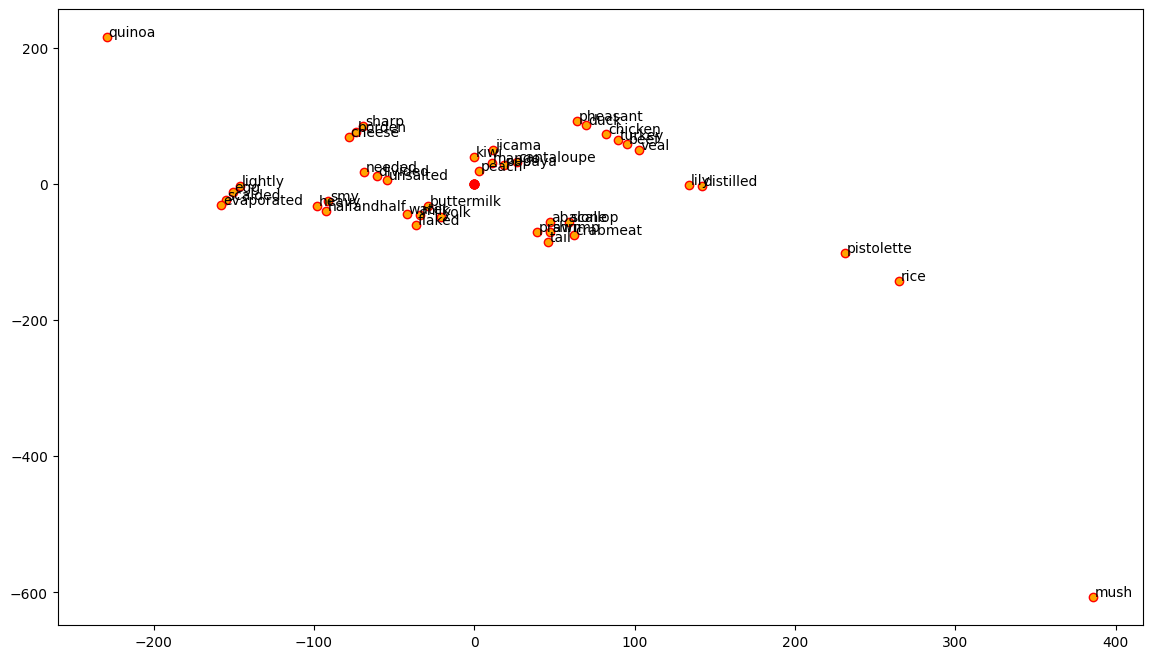

In [18]:
#visualization with Tsne
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec_model.wv[words]
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))

plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# make each key and it values with different color
import matplotlib.cm as cm
# set color to each key and its values
color = cm.rainbow(np.linspace(0, 1, len(similar_words.keys())))
for word, c in zip(similar_words.keys(), color):
    X = word2vec_model.wv[similar_words[word]]
    plt.scatter(X[:, 0], X[:, 1], c=[c])

plt.show()

In [19]:
# # get word similarity
# word2vec_model.wv.most_similar('chicken')
# word2vec_model.wv.most_similar('chicken')

# word2vec_model.wv.most_similar('cheese',topn=10)

In [20]:
# check the loss of the model
word2vec_model.get_latest_training_loss()

# check the vocabulary size
word2vec_model.wv.index_to_key[:10]
len(word2vec_model.wv)

7013

In [21]:
# !pip install POT

In [22]:
# get similarity between two ingredients with different teqnique
# convert the ingredients to vector if the ingredients is in the vocabulary using get_vector_pre_trained function
# edit the function to split words
def get_vector_pre_trained(x,model):
    s_vec = w_vec = np.zeros(model.vector_size)

    for word in x.split():
        if word in model:
            w_vec = model[word]
            s_vec = s_vec + w_vec
    # if s_vec.all() == 0:
    #     s_vec = np.zeros(256)
    return s_vec


In [23]:
# create vector column for important columns
df['ingredients_vector'] = df['ingredients_cleaned'].apply(lambda x: get_vector_pre_trained(x,word2vec_model.wv))
df['name_vector'] = df['name_cleaned'].apply(lambda x: get_vector_pre_trained(x,word2vec_model.wv))
df['category_vector'] = df['category_cleaned'].apply(lambda x: get_vector_pre_trained(x,word2vec_model.wv))
df['summary_vector'] = df['summary_cleaned'].apply(lambda x: get_vector_pre_trained(x,word2vec_model.wv))
df['diet_type_vector'] = df['diet_type_cleaned'].apply(lambda x: get_vector_pre_trained(x,word2vec_model.wv))
df['all_text_vector'] = df['all_text'].apply(lambda x: get_vector_pre_trained(x,word2vec_model.wv))


In [24]:
df.head()

,name,url,category,author,summary,rating,rating_count,review_count,ingredients,directions,prep,cook,total,servings,yield,calories,carbohydrates_g,sugars_g,fat_g,saturated_fat_g,cholesterol_mg,protein_g,dietary_fiber_g,sodium_mg,calories_from_fat,calcium_mg,iron_mg,magnesium_mg,potassium_mg,vitamin_a_iu_IU,niacin_equivalents_mg,vitamin_c_mg,folate_mcg,thiamin_mg,diet_type,allergens,cuisine,name_cleaned,category_cleaned,summary_cleaned,ingredients_cleaned,diet_type_cleaned,all_text,ingredients_vector,name_vector,category_vector,summary_vector,diet_type_vector,all_text_vector
0,Simple Macaroni and Cheese,https://www.allrecipes.com/recipe/238691/simpl...,main-dish,g0dluvsugly,A very quick and easy fix to a tasty side-dish...,4.42,834,575,1 (8 ounce) box elbow macaroni ; ¼ cup butter ...,Bring a large pot of lightly salted water to a...,10 mins,20 mins,30 mins,4,4 servings,630.2,55.0,7.6,33.6,20.9,99.6,26.5,2.1,777.0,302.2,567.9,2.7,61.8,380.0,1152.0,10.1,0.3,165.6,0.7,"vegetarian, omnivore, keto",milk,chinese,simple macaroni cheese,maindish,a quick easy fix tasty sidedish fancy designer...,ounce box elbow macaroni butter allpurpose flm...,vegetarian omnivore keto,simple macaroni cheese ounce box elbow macaron...,"[-0.2979931505396962, 0.042933489254210144, 0....","[-0.2122910190373659, -0.0015747621655464172, ...","[0.06252775341272354, -0.1350065916776657, -0....","[-0.36709962971508503, 0.19350149296224117, -0...","[0.03336552856490016, -0.02393181435763836, -0...","[-0.7814905173145235, 0.07592181401560083, -0...."
1,Gourmet Mushroom Risotto,https://www.allrecipes.com/recipe/85389/gourme...,main-dish,Myleen Sagrado Sjödin,Authentic Italian-style risotto cooked the slo...,4.80,3388,2245,"6 cups chicken broth, divided ; 3 tablespoons ...","In a saucepan, warm the broth over low heat. W...",20 mins,30 mins,50 mins,6,6 servings,430.6,56.6,4.4,16.6,6.6,29.3,11.3,2.7,1130.8,149.8,70.1,2.1,24.1,692.0,520.3,7.5,3.8,36.9,0.1,"vegetarian, omnivore, paleo, keto",milk,unknown,gourmet mushroom risotto,maindish,authentic italianstyle risotto cooked slow pai...,chicken broth divided olive oil divided pound ...,vegetarian omnivore paleo keto,gourmet mushroom risotto chicken broth divided...,"[0.44354635558556765, -0.687675330635102, 1.43...","[-0.10134947847109288, -0.1675146408379078, 0....","[0.06252775341272354, -0.1350065916776657, -0....","[0.1433963740710169, 0.07311663666041568, 0.29...","[0.10713487444445491, -0.061797210946679115, -...","[0.6552558790426701, -0.9788771374369389, 1.29..."
2,Dessert Crepes,https://www.allrecipes.com/recipe/19037/desser...,breakfast-and-brunch,ANN57,Essential crepe recipe. Sprinkle warm crepes ...,4.80,1156,794,"4 eggs, lightly beaten ; 1 ⅓ cups milk ; 2 ta...","In large bowl, whisk together eggs, milk, melt...",10 mins,10 mins,20 mins,8,8 crepes,163.8,17.2,5.3,7.7,3.4,111.1,6.4,0.4,234.5,69.0,65.6,1.2,11.2,115.4,347.8,2.3,0.1,43.5,0.2,"vegetarian, omnivore, paleo","eggs, milk",chinese,dessert crepe,breakfastandbrunch,essential crepe recipe sprinkle warm crepe sug...,egg lightly beaten milk butter melted allpurpo...,vegetarian omnivore paleo,dessert crepe egg lightly beaten milk butter m...,"[0.2729803095571697, 0.15891074907267466, -0.1...","[0.03221208089962602, 0.011580062564462423, -0...","[0.08502260595560074, -0.09736712276935577, -0...","[0.4435504670254886, 0.3797841724008322, -0.25...","[0.08448152942582965, -0.0015554148703813553, ...","[0.9182469928637147, 0.45135244639823213, -1.0..."
3,Pork Steaks,https://www.allrecipes.com/recipe/70463/pork-s...,meat-and-poultry,BABYLOVE1222,My mom came up with this recipe when I was a c...,4.57,689,539,¼ cup butter ; ¼ cup soy sauce ; 1 bunch green...,"Melt butter in a skillet, and mix in the soy s...",15 mins,30 mins,45 mins,6,6 servings,353.1,3.9,1.1,25.4,11.4,118.0,26.5,1.1,719.7,228.4,59.0,2.5,35.4,436.9,618.3,9.0,7.4,25.8,0.7,"omnivore, keto",milk,chinese,pork steak,meatandpoultry,my mom came recipe child it only way eat green...,butter soy sauce bunc

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35502 entries, 0 to 35501
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   35502 non-null  object 
 1   url                    35502 non-null  object 
 2   category               35502 non-null  object 
 3   author                 35502 non-null  object 
 4   summary                35502 non-null  object 
 5   rating                 35502 non-null  float64
 6   rating_count           35502 non-null  int64  
 7   review_count           35502 non-null  int64  
 8   ingredients            35502 non-null  object 
 9   directions             35502 non-null  object 
 10  prep                   35502 non-null  object 
 11  cook                   35502 non-null  object 
 12  total                  35502 non-null  object 
 13  servings               35502 non-null  int64  
 14  yield                  35501 non-null  object 
 15  ca

In [26]:
df.to_csv('out_text_data.csv')


In [25]:
Stop

NameError: ignored

In [ ]:
# now we need to build a recommender system based on the ingredients, name, category, summary, diet_type to predict the best recipe for the user with high similarity
# we will use cosine similarity to get the similarity between the user input and the recipes in the dataset
# we will use the ingredients, name, category, summary, diet_type as features to predict the best recipe for the user

def get_similar_recipe_full_model(test_df_input,no_of_recipes=5):
    clean_features = ['name', 'category', 'summary', 'ingredients','diet_type']
    for column in clean_features:
        # apply_with_bar(test_df_input,column)
        test_df_input[f'{column}_cleaned'] = test_df_input[column].apply(text_cleaning)

    # get the vector of the input
    ingredients_vector = get_vector_pre_trained(test_df_input['ingredients_cleaned'][0],word2vec_model.wv)
    name_vector = get_vector_pre_trained(test_df_input['name_cleaned'][0],word2vec_model.wv)
    category_vector = get_vector_pre_trained(test_df_input['category_cleaned'][0],word2vec_model.wv)
    summary_vector = get_vector_pre_trained(test_df_input['summary_cleaned'][0],word2vec_model.wv)
    diet_type_vector = get_vector_pre_trained(test_df_input['diet_type_cleaned'][0],word2vec_model.wv)

    # try to abbreviation the previous code
    # get the vector of the input


    # get the cosine similarity between the input and the recipes in the dataset
    df['ingredients_similarity'] = df['ingredients_vector'].apply(lambda x: word2vec_model.wv.cosine_similarities(ingredients_vector,[x])[0])
    df['name_similarity'] = df['name_vector'].apply(lambda x: word2vec_model.wv.cosine_similarities(name_vector,[x])[0])
    df['category_similarity'] = df['category_vector'].apply(lambda x: word2vec_model.wv.cosine_similarities(category_vector,[x])[0])
    df['summary_similarity'] = df['summary_vector'].apply(lambda x: word2vec_model.wv.cosine_similarities(summary_vector,[x])[0])
    df['diet_type_similarity'] = df['diet_type_vector'].apply(lambda x: word2vec_model.wv.cosine_similarities(diet_type_vector,[x])[0])
    # get the mean of the similarity between the input and the recipes in the dataset
    df['mean_similarity'] = (df['ingredients_similarity'] + df['name_similarity'] + df['category_similarity'] + df['summary_similarity'] + df['diet_type_similarity'])/5
    # get the top 5 recipes with high similarity

    top_recipes = df.sort_values(by='mean_similarity',ascending=False).head(no_of_recipes)
    return top_recipes

# test the function
test_name = 'Macaroni and Cheese'
test_category = 'main-dish'
test_summary = 'This is a recipe for macaroni and cheese.'
test_ingredients = 'macaroni, cheese, butter, milk'
test_diet_type = 'Vegetarian'

# add to dataframe

test_df = pd.DataFrame({'name':[test_name],'category':[test_category],'summary':[test_summary],'ingredients':[test_ingredients],'diet_type':[test_diet_type]})

get_similar_recipe_full_model(test_df)

In [ ]:
# make a function to get the top 5 recipes with high similarity but similar with free text input and with all text column
def get_similar_recipe_free_text(test_text_input,no_of_recipes=5):
    # get the vector of the input
    text_vector = get_vector_pre_trained(test_text_input,word2vec_model.wv)
    # get the cosine similarity between the input and the recipes in the dataset
    df['text_similarity'] = df['all_text_vector'].apply(lambda x: word2vec_model.wv.cosine_similarities(text_vector,[x])[0])
    # get the top 5 recipes with high similarity
    top_recipes = df.sort_values(by='text_similarity',ascending=False).head(no_of_recipes)
    return top_recipes


# test the function
test_text = 'This is a recipe for macaroni and cheese.'
get_similar_recipe_free_text(test_text)

In [ ]:
# Make final function merge the two functions together based on mode parameter to get free text mode or not full model
# make the function input as a dictionary
def get_similar_recipe(user_input):
    if user_input['mode']== 'full_model':
        # convert to dataframe from dictionary to dataframe using keys as columns
        user_input_df = pd.DataFrame(test_input,index=[0])
        # user_input_df = pd.DataFrame(user_input['name'],user_input['category'],user_input['summary'],user_input['ingredients'],user_input['diet_type'])

        return get_similar_recipe_full_model(user_input_df,user_input['no_of_recipes'])
    elif user_input['mode'] == 'free_text':
        return get_similar_recipe_free_text(user_input['text'],user_input['no_of_recipes'])
    else:
        return 'Please enter the correct mode'


# test the function
test_input = {'name':'Macaroni and Cheese','category':'main-dish','summary':'This is a recipe for macaroni and cheese.',
              'ingredients':'macaroni, cheese, butter, milk','diet_type':'Vegetarian',
              'mode':'full_model','no_of_recipes':5}


get_similar_recipe(test_input)

# test the function with free text mode
test_input = {'text':'This is a recipe for macaroni and cheese.','mode':'free_text','no_of_recipes':5}
get_similar_recipe(test_input)


In [ ]:
# !pip install flask
# !pip install pyngrok


In [ ]:
import sys
from pyngrok import ngrok
from flask import Flask, request, jsonify
import os

app = Flask(__name__)
# make app config "ENV" = "development" to make the app run in development mode
app.config["ENV"] = "development"
app.config["USE_NGROK"] = True


@app.route('/get-recipe', methods=['POST'])
def get_recipe():

    json_data = request.get_json()  # Get the JSON data from the request
    print(json_data)

    # test_input = json_data['test_input']  # Extract the required input from the JSON
    # print(test_input)
    result = get_similar_recipe(json_data).to_json()  # Call your function with the input
    print("result", jsonify(result)  )
    return jsonify(result)  # Return the result as a JSON response

if __name__ == '__main__':
    app.run()

In [ ]:
# if __name__ == '__main__':
#     app.run(host="localhost",port=13950, debug=False)